In [13]:
# Import líbrerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43889 entries, 0 to 43888
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Orden            43889 non-null  int64  
 1   Tipo Contenedor  43889 non-null  object 
 2   Modelo           43889 non-null  object 
 3   Lote             43889 non-null  int64  
 4   Distrito         43889 non-null  object 
 5   Barrio           43889 non-null  object 
 6   Carga            43889 non-null  object 
 7   Coordenada X     43889 non-null  float64
 8   Coordenada Y     43889 non-null  float64
 9   Latitud          43889 non-null  float64
 10  Longitud         43889 non-null  float64
 11  Código Situado   43889 non-null  object 
 12  Dirección        43889 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 4.4+ MB
None

Estadísticas de columnas numéricas:
              Orden          Lote   Coordenada X  Coordenada Y       La

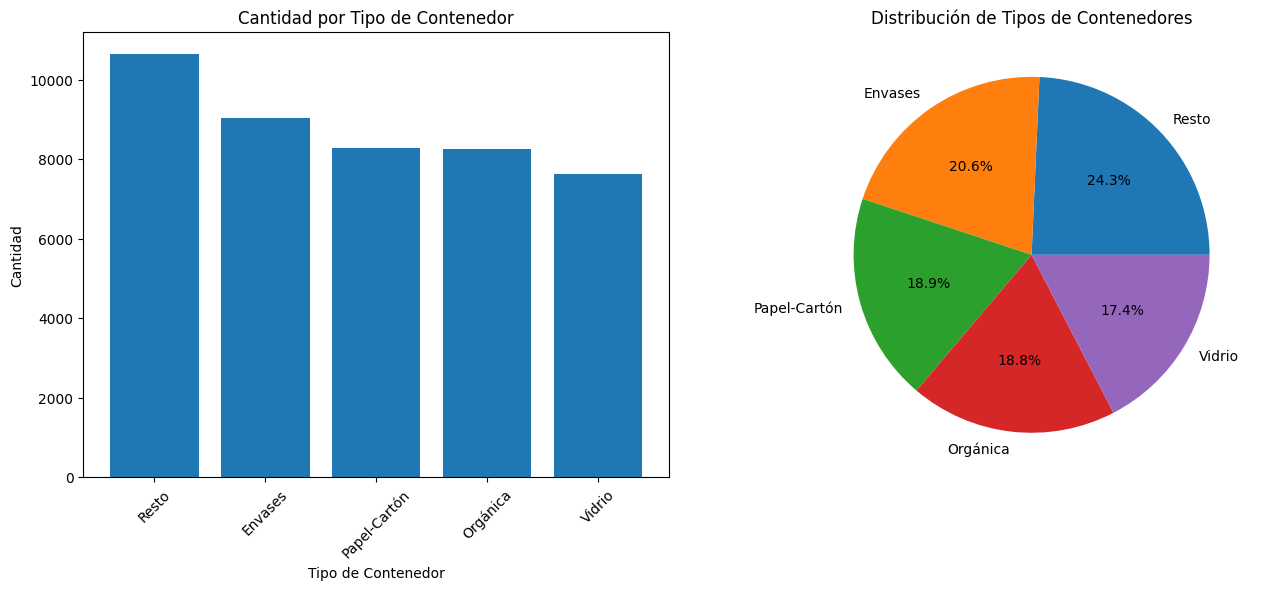


Archivo 'conteo_tipo_contenedores.csv' generado correctamente.

PROYECTO FINALIZADO.
       Orden Tipo Contenedor      Modelo  Lote   Distrito        Barrio  \
0          1    Papel-Cartón  PC 3100 CS     2  VICALVARO  EL CAÑAVERAL   
1          2          Vidrio   V 3100 CS     2  VICALVARO  EL CAÑAVERAL   
2          3    Papel-Cartón  PC 3100 CS     2  VICALVARO  EL CAÑAVERAL   
3          4          Vidrio   V 3100 CS     2  VICALVARO  EL CAÑAVERAL   
4          5           Resto   R 2750 CL     2  VICALVARO  EL CAÑAVERAL   
...      ...             ...         ...   ...        ...           ...   
43884  45207           Resto    R 800 CT     1     TETUAN    BERRUGUETE   
43885  45208         Envases    E 800 CT     1     TETUAN    BERRUGUETE   
43886  45209         Envases    E 800 CT     1     TETUAN    BERRUGUETE   
43887  45210        Orgánica    O 800 CT     1     TETUAN    BERRUGUETE   
43888  45211        Orgánica    O 800 CT     1     TETUAN    BERRUGUETE   

             

In [12]:
df = pd.read_csv('/content/Contenedores_varios.csv', sep=';')
df.head()

#info general

print("\nInformación del dataset:")
print(df.info())

print("\nEstadísticas de columnas numéricas:")
print(df.describe())

print("\nValores nulos por columna:")
print(df.isnull().sum())

#limpieza de datos

columnas_eliminar = ["Código Situado"]
df = df.drop(columns=[col for col in columnas_eliminar if col in df.columns], errors='ignore')

if "Coordenada X" in df.columns:
    df["Coordenada X"] = pd.to_numeric(df["Coordenada X"], errors='coerce')
if "Coordenada Y" in df.columns:
    df["Coordenada Y"] = pd.to_numeric(df["Coordenada Y"], errors='coerce')

#analizis de datos

conteo_tipo = df["Tipo Contenedor"].value_counts()
print("\nCantidad de contenedores por tipo:")
print(conteo_tipo)

conteo_barrio = None
if "Barrio" in df.columns:
    conteo_barrio = df["Barrio"].value_counts()
    print("\nCantidad de contenedores por barrio:")
    print(conteo_barrio)

#graficas
plt.figure(figsize=(20,6))

# grafica de barras
plt.subplot(1, 3, 1)
plt.bar(conteo_tipo.index, conteo_tipo.values)
plt.title("Cantidad por Tipo de Contenedor")
plt.xlabel("Tipo de Contenedor")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)


# grafica pastel
plt.subplot(1, 3, 2)
plt.pie(conteo_tipo.values, labels=conteo_tipo.index, autopct='%1.1f%%')
plt.title("Distribución de Tipos de Contenedores")

plt.tight_layout()
plt.show()

conteo_tipo.to_csv("conteo_tipo_contenedores.csv")
print("\nArchivo 'conteo_tipo_contenedores.csv' generado correctamente.")

print("\nPROYECTO FINALIZADO.")

print(df)